# **IRIS FLOWER CLASSIFICATION**

### **Description**  
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

![picture](https://drive.google.com/uc?export=view&id=1GfsVqhovFocLZh75KdBNQ0MdSx3uBEAq)

Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d arshid/iris-flower-dataset

iris-flower-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/iris-flower-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing the Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### **Creating DataFrame**

In [ ]:
df=pd.read_csv('IRIS.csv')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  150
Number of Columns:  5


### **Exploring the DataFrame**

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### **No Null Value** (Balanced Dataset)

In [ ]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

### **Exploratory Data Analysis**

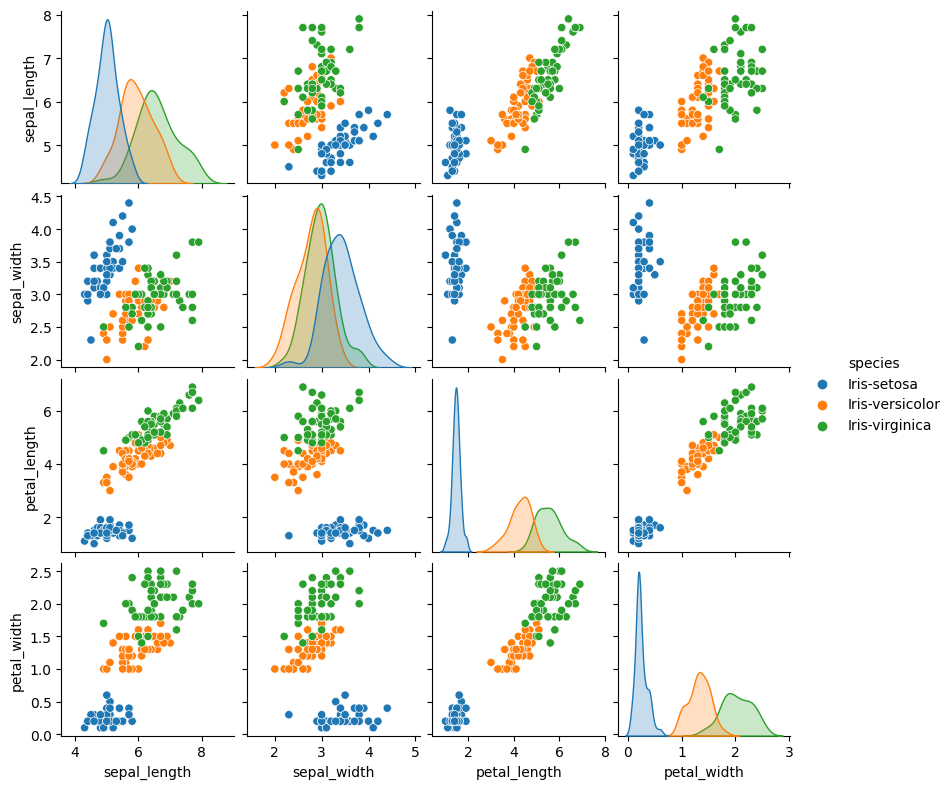

In [ ]:
sns.pairplot(df,hue='species', height=2)
plt.show()

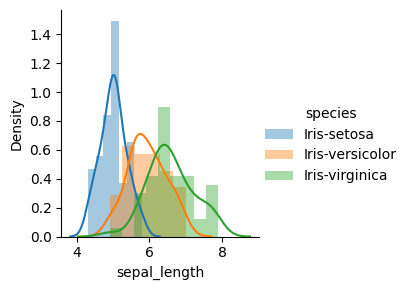

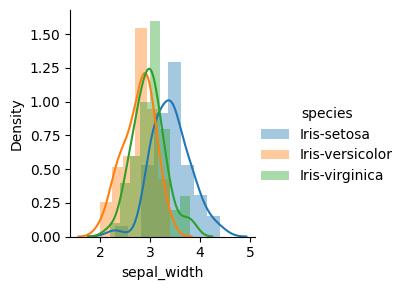

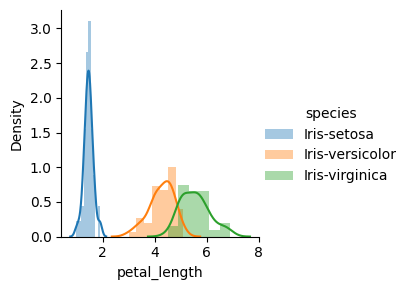

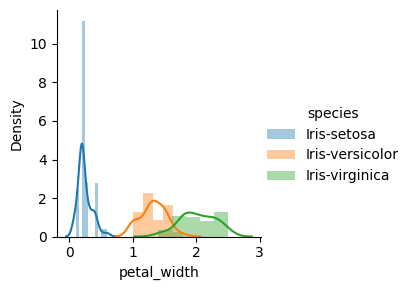

In [ ]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "sepal_length").add_legend()
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "sepal_width").add_legend()
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "petal_length").add_legend()
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.distplot, "petal_width").add_legend()
plt.show()


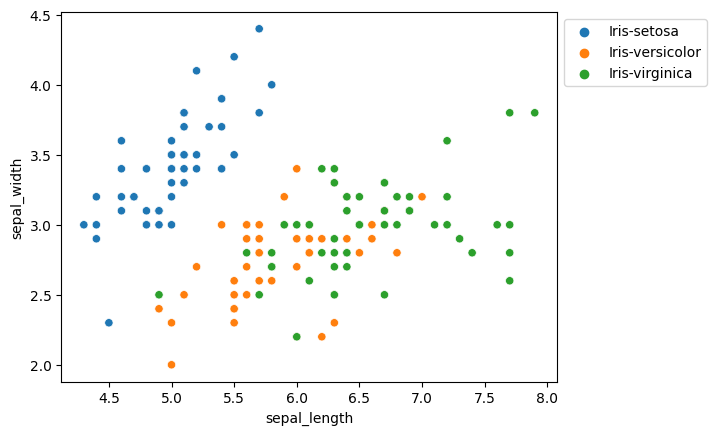

In [ ]:
# Sepal length VS Sepal Width
sns.scatterplot(x='sepal_length', y='sepal_width',hue='species', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

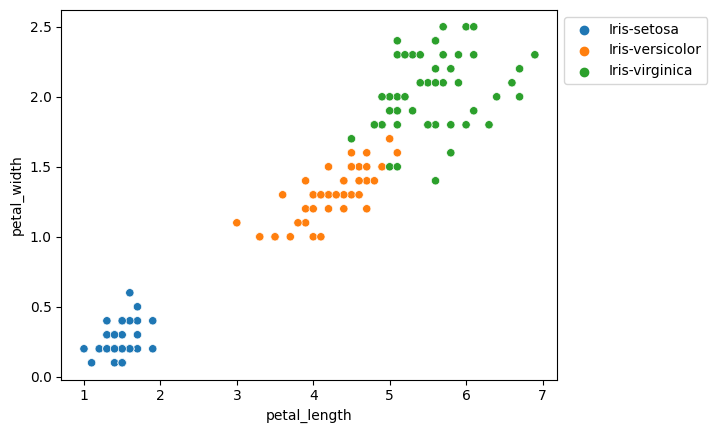

In [ ]:
# Petal Length VS Petal Width
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

### **Label Encoding of species column**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['species']= label_encoder.fit_transform(df['species'])

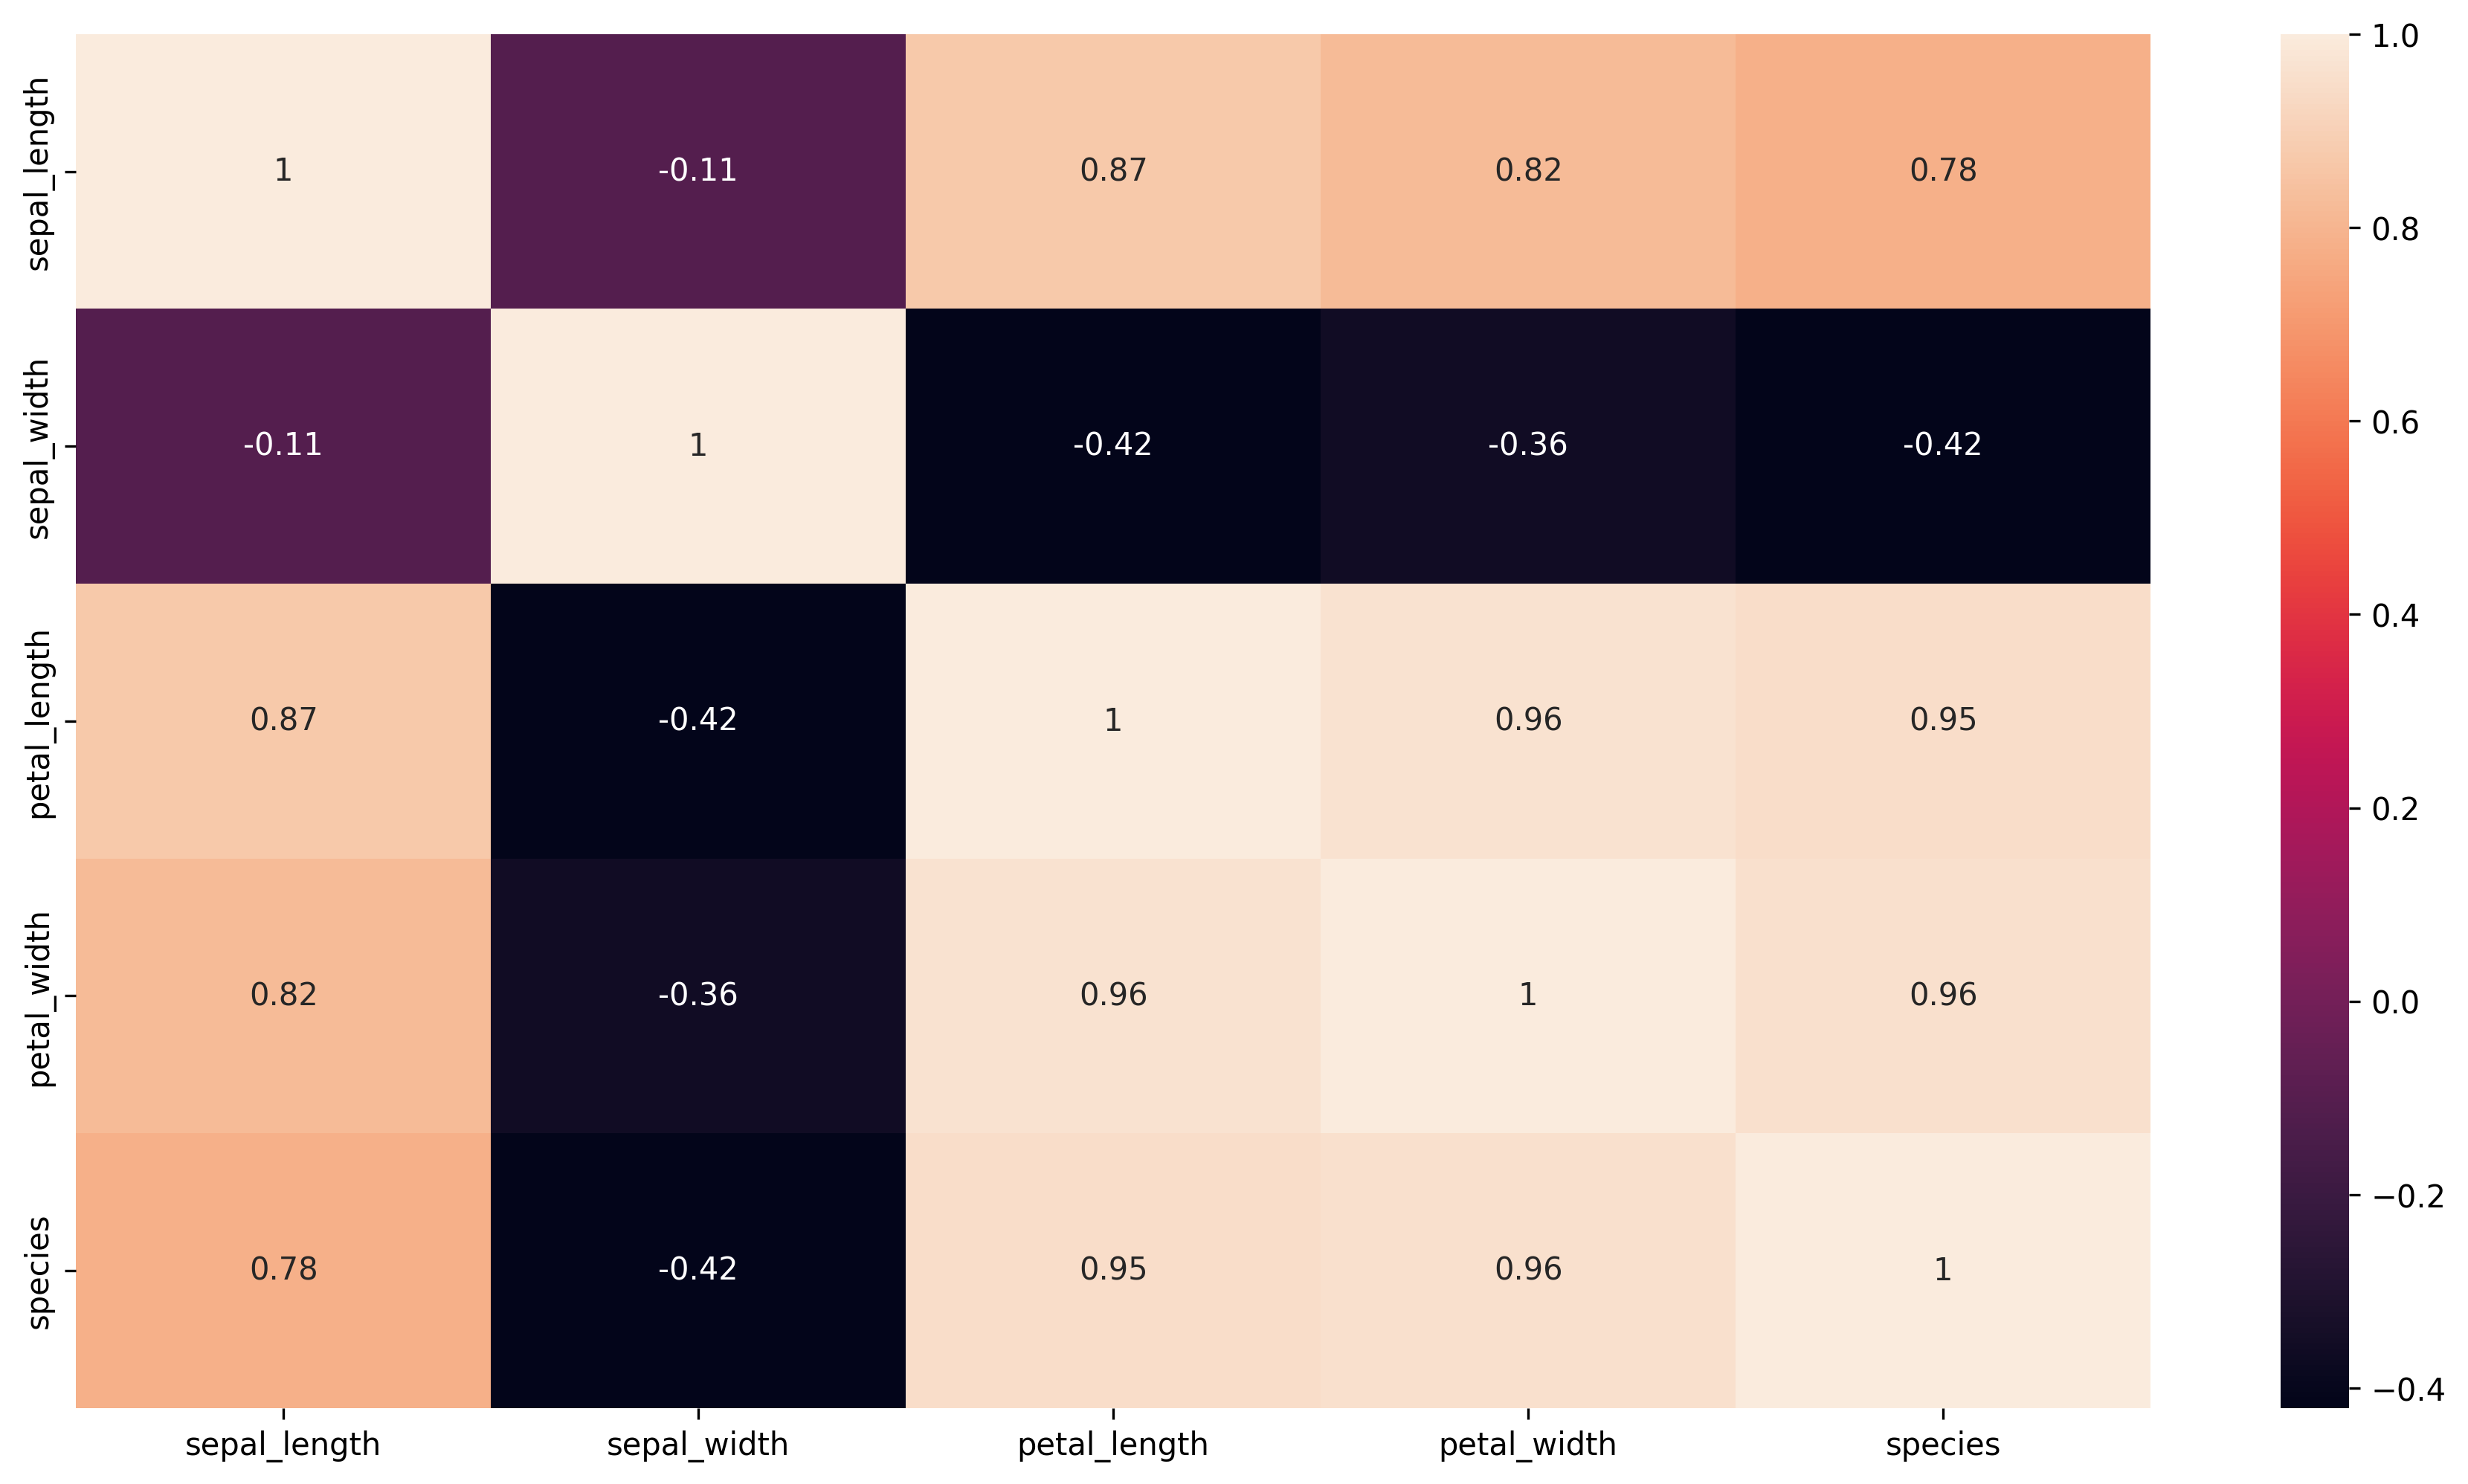

In [ ]:
fig=plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(df.corr(), annot = True)
plt.show()

### **Splitting the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=["species"],axis=1),
    df['species'],
    test_size = 0.25,
    random_state = 0)

### **ML Model**

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Naive Bayes":RandomForestClassifier(),
        "KNN Classifier": KNeighborsClassifier(),
        'SVM Classifier': SVC(kernel='linear')}

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  model_train_accuracy=accuracy_score(y_train,y_train_pred)
  model_train_f1=f1_score(y_train,y_train_pred,average='macro')
  model_train_precision=precision_score(y_train,y_train_pred,average='macro')
  model_train_recall=recall_score(y_train,y_train_pred,average='macro')
  #model_train_rocauc_score=roc_auc_score(y_train,y_train_pred,multi_class='ovr')

  model_test_accuracy=accuracy_score(y_test,y_test_pred)
  model_test_f1=f1_score(y_test,y_test_pred,average='macro')
  model_test_precision=precision_score(y_test,y_test_pred,average='macro')
  model_test_recall=recall_score(y_test,y_test_pred,average='macro')
  #model_test_rocauc_score=roc_auc_score(y_test,y_test_pred,multi_class='ovr')

  print(list(models.keys())[i])

  print('Model performance for Training Set')
  print("-Accuracy: {:.4f}".format(model_train_accuracy))
  print("-F1 Score: {:.4f}".format(model_train_f1))
  print("-Precision: {:.4f}".format(model_train_precision))
  print("-Recall {:.4f}".format(model_train_recall))
  #print("-ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

  print('--------------------------------')

  print('Model performance for Testing Set')
  print("-Accuracy: {:.4f}".format(model_test_accuracy))
  print("-F1 Score: {:.4f}".format(model_test_f1))
  print("-Precision: {:.4f}".format(model_test_precision))
  print("-Recall: {:.4f}".format(model_test_recall))
  #print("-ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
  print('-----------------------------------------------')
  print('-----------MOVINING TO NEXT ALGO---------------')
  print('-----------------------------------------------')

Logistic Regression
Model performance for Training Set
-Accuracy: 0.9821
-F1 Score: 0.9820
-Precision: 0.9845
-Recall 0.9804
--------------------------------
Model performance for Testing Set
-Accuracy: 0.9737
-F1 Score: 0.9717
-Precision: 0.9667
-Recall: 0.9792
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Decision Tree
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall 1.0000
--------------------------------
Model performance for Testing Set
-Accuracy: 0.9737
-F1 Score: 0.9717
-Precision: 0.9667
-Recall: 0.9792
-----------------------------------------------
-----------MOVINING TO NEXT ALGO---------------
-----------------------------------------------
Random Forest
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall 1.0000
--------------------------------
Model performance for Testing Set
-Accur

Note
1. Training Accuracy of Decision Tree, Random Forest, Naive Bayes is 1 (which is high positive) and Test Accuracy is 0.97 (which is also high positive).
2. Training Accuracy of Logisitic Regression and Support Vector Machine (SVM) is 0.98 and Testing Accuracy is of 0.97 respectively.
3. Training and Testing Accuracy for KNN is 0.97
4. Therefore all have same testing accuracy

### **Prediciton**

In [ ]:
x_test1=[[5.0,3.6,1.4,0.2]]
y_test_pred1=model.predict(x_test1)
y_test_pred1

array([0])

In [ ]:
x_test2=[[8.0,6.2,8.55,5]]
y_test_pred2=model.predict(x_test2)
y_test_pred2

array([2])

In [ ]:
x_test3=[[5.0,3.2,3.55,0.3]]
y_test_pred3=model.predict(x_test3)
y_test_pred3

array([1])